# 주어진 시계열 데이터에 이상치 탐지 및 처리 실습

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats

#### 시계열 데이터 생성, 이상치 추가, 데이터 프레임 생성

In [10]:
# 데이터 생성
dates = pd.date_range(start='2023-01-01', periods=100, freq='D')
values = np.random.randn(100)* 10

# 이상치 추가
values[15] =70 

# 데이터 프레임 생성
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})

print(data)
print(data['Value'].iloc[15])

         Date     Value
0  2023-01-01  0.867225
1  2023-01-02 -7.737751
2  2023-01-03  1.682244
3  2023-01-04 -3.722035
4  2023-01-05 -1.582636
..        ...       ...
95 2023-04-06  0.188564
96 2023-04-07 -2.868764
97 2023-04-08 -8.421849
98 2023-04-09 -9.827213
99 2023-04-10 -5.225395

[100 rows x 2 columns]
70.0


In [11]:
#이상치 탐지
z_scores = np.abs(stats.zscore(data['Value']))

# 임계치 설정
thredhold = 3

# z- score 임계값 초과하는 체크
outliers = z_scores > thredhold

# 이상치를 -> 결측치로 처리
data.loc[outliers, 'Value'] = np.nan

# 결측치 보간
data['Value'] = data['Value'].interpolate()

print(data['Value'].iloc[15]) 

-13.80162774460996


#### 시각화 코드

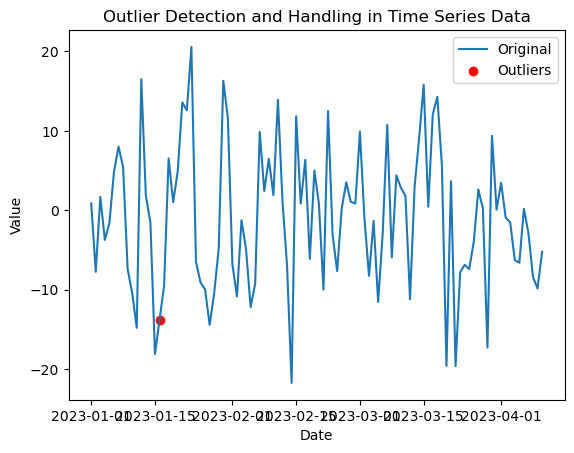

이상치 처리된 데이터 확인 >>  13.577340909275822


In [12]:
# 시계열 데이터 시각화
plt.plot(data['Date'], data['Value'], label='Original')
plt.scatter(data[outliers]['Date'], data[outliers]['Value'], color='red', label='Outliers')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Outlier Detection and Handling in Time Series Data')
plt.legend()
plt.show()

 

# 처리된 데이터 확인
print("이상치 처리된 데이터 확인 >> " , data['Value'].iloc[20])